In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("shopping_data.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df = df.drop(["CustomerID", "Genre"],axis=1)

In [7]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
df_mn = mn.fit_transform(df )

In [9]:
df_mn_df = pd.DataFrame(df_mn, columns = df.columns, index = df.index)

In [10]:
df_mn_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [11]:
from sklearn.cluster import KMeans

In [35]:
km = KMeans(n_clusters=4, n_init=500)

In [36]:
out = km.fit(df_mn_df)

In [37]:
km.labels_

array([3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 2, 2, 2, 3, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [38]:
df["label"] = km.labels_

In [39]:
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,3
1,21,15,81,3
2,20,16,6,3
3,23,16,77,3
4,31,17,40,3
5,22,17,76,3
6,35,18,6,2
7,23,18,94,3
8,64,19,3,2
9,30,19,72,3


In [40]:
km.inertia_

12.65028767622993

In [41]:
from sklearn.metrics import silhouette_score

In [42]:
silhouette_score(df_mn_df, km.labels_, metric="euclidean")

0.392319202055722

### WCSS

In [43]:
wcss = []

for i in range(1,12):
    km = KMeans(n_clusters=i, init="k-means++", random_state=100)
    km.fit(df_mn_df)
    wcss.append(km.inertia_)

In [44]:
import seaborn as sns

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

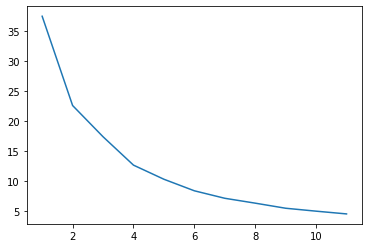

In [47]:
sns.lineplot(range(1,12), wcss, markers="o")

### Agglomerative Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
agg = AgglomerativeClustering(n_clusters=3, affinity="cosine", linkage="average")

In [67]:
var = agg.fit(df_mn_df)

In [68]:
silhouette_score(df_mn_df, agg.labels_)

0.35954458447830573